In [1]:
# 读取一个人的数据
# 标记对应的步态特征时刻
# 使用小波分析计算对应的特征时刻

## 导入包

In [61]:
import os
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

In [62]:
%matplotlib widget

## 读取数据

In [63]:
# 路径
xsens_excel_path = "/Users/wangshuaibo/Library/CloudStorage/OneDrive-bsu.edu.cn/工作文档/北京悦动/脑卒中项目/阿帅笔记/HarbinStroke/Xsens/Process_Data/Excel/20230706_凌若飞_Xsens_无矫形器-1.xlsx"
excelfile = pd.ExcelFile(xsens_excel_path, engine='openpyxl')
excelfile.sheet_names

['General Information',
 'Markers',
 'Segment Orientation - Quat',
 'Segment Orientation - Euler',
 'Segment Position',
 'Segment Velocity',
 'Segment Acceleration',
 'Segment Angular Velocity',
 'Segment Angular Acceleration',
 'Joint Angles ZXY',
 'Joint Angles XZY',
 'Ergonomic Joint Angles ZXY',
 'Ergonomic Joint Angles XZY',
 'Center of Mass',
 'Sensor Free Acceleration',
 'Sensor Magnetic Field',
 'Sensor Orientation - Quat',
 'Sensor Orientation - Euler']

In [64]:
# 路径
xsens_excel_path = "/Users/wangshuaibo/Library/CloudStorage/OneDrive-bsu.edu.cn/工作文档/北京悦动/脑卒中项目/阿帅笔记/HarbinStroke/Xsens/Process_Data/Excel/20230706_凌若飞_Xsens_无矫形器-1.xlsx"
excelfile = pd.ExcelFile(xsens_excel_path, engine='openpyxl')
excelfile.sheet_names

['General Information',
 'Markers',
 'Segment Orientation - Quat',
 'Segment Orientation - Euler',
 'Segment Position',
 'Segment Velocity',
 'Segment Acceleration',
 'Segment Angular Velocity',
 'Segment Angular Acceleration',
 'Joint Angles ZXY',
 'Joint Angles XZY',
 'Ergonomic Joint Angles ZXY',
 'Ergonomic Joint Angles XZY',
 'Center of Mass',
 'Sensor Free Acceleration',
 'Sensor Magnetic Field',
 'Sensor Orientation - Quat',
 'Sensor Orientation - Euler']

In [65]:
# 路径
xsens_excel_path = "/Users/wangshuaibo/Library/CloudStorage/OneDrive-bsu.edu.cn/工作文档/北京悦动/脑卒中项目/阿帅笔记/HarbinStroke/Xsens/Process_Data/Excel/20230706_凌若飞_Xsens_无矫形器-1.xlsx"
excelfile = pd.ExcelFile(xsens_excel_path, engine='openpyxl')
excelfile.sheet_names

['General Information',
 'Markers',
 'Segment Orientation - Quat',
 'Segment Orientation - Euler',
 'Segment Position',
 'Segment Velocity',
 'Segment Acceleration',
 'Segment Angular Velocity',
 'Segment Angular Acceleration',
 'Joint Angles ZXY',
 'Joint Angles XZY',
 'Ergonomic Joint Angles ZXY',
 'Ergonomic Joint Angles XZY',
 'Center of Mass',
 'Sensor Free Acceleration',
 'Sensor Magnetic Field',
 'Sensor Orientation - Quat',
 'Sensor Orientation - Euler']

## 凌若飞步行特征时刻
有矫形器第一次测试
- 左脚第一次着地	左脚第二次着地	左脚第三次着地	
- 1890	2003	2119	
- 右脚第一次着地	右脚第二次着地	右脚第三次着地
- 1944	2057	2168

In [66]:
events = [1890, 2003, 2119]

## 关节位置绘制峰值

In [67]:
plt.close()

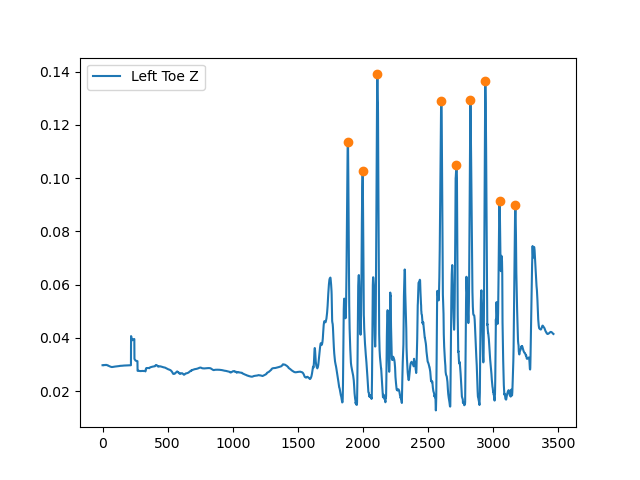

In [68]:
seg_pos = pd.read_excel(xsens_excel_path,sheet_name='Segment Position')
L_Toe_z = seg_pos['Left Toe z']
seg_pos_peaks, _ = find_peaks(L_Toe_z, height=0.08)
plt.plot(L_Toe_z, label="Left Toe Z")
plt.plot(seg_pos_peaks, L_Toe_z[seg_pos_peaks],"o")
plt.legend()

## 脚踝角度绘制峰值
在 GaitPy 中 util.py 中只调用了 Prominence 参数
```python
def _detect_peaks(y, prominence):
    from scipy.signal import find_peaks
    peaks, properties = find_peaks(y, prominence=prominence)

    return peaks
```
在 gait.py 中，有 prominence 的取值

`ic_prom=5, fc_prom=10`

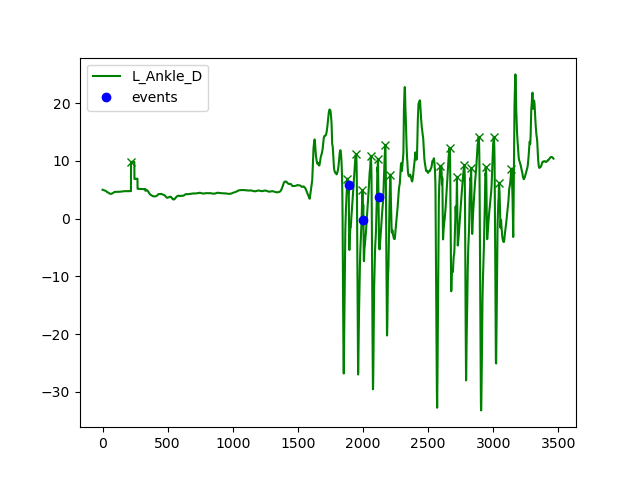

In [71]:
# 提取数据
joint_angels = pd.read_excel(xsens_excel_path,sheet_name="Joint Angles ZXY")
joint_angels.columns
L_Ankle_D = joint_angels['Left Ankle Dorsiflexion/Plantarflexion']

# 选取特定区域
Sel_L_Ankle_D = joint_angels.loc[events[0]-200:events[1]+200,'Left Ankle Dorsiflexion/Plantarflexion']

# 获取峰值
angle_peaks, _ = find_peaks(L_Ankle_D,height=[2,15], prominence=5)

plt.close()
# 根据脚踝角度查找特征时刻
plt.plot(L_Ankle_D,label="L_Ankle_D",color="green")
plt.plot(angle_peaks, L_Ankle_D[angle_peaks],"x", color="green") 

# 根据肉眼判断特征时刻
plt.plot(events,L_Ankle_D[events],"o",label="events",color="blue")
plt.legend()

## 与特征时刻最接近的 3 个时刻

In [19]:
# 选取和目标数值最为接近的 3 个值
nearest_values = []
for event in events:
    nearest_index = np.argmin(np.abs(angle_peaks - event))
    nearest_value = angle_peaks[nearest_index]
    nearest_values.append(nearest_value)

print(nearest_values)
"""
上述是简单的算法
- 时间复杂度为 O(m*n): n是events 列表的长度，m 是angle_peaks 数组的长度
- 空间复杂度为 O(n):n 是events 列表的长度，考虑原始输入数据的空间复杂度，
    例如angle_peaks数组的存储空间，则会额外增加O(m)，其中m是angle_peaks数组的长度。
"""

[1880, 1995, 2114]


'\n上述是简单的算法\n- 时间复杂度为 O(m*n): n是events 列表的长度，m 是angle_peaks 数组的长度\n- 空间复杂度为 O(n):n 是events 列表的长度，考虑原始输入数据的空间复杂度，\n    例如angle_peaks数组的存储空间，则会额外增加O(m)，其中m是angle_peaks数组的长度。\n'

In [20]:
events

[1890, 2003, 2119]

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
MAE = mean_absolute_error(events, nearest_values)
MAPE = mean_absolute_percentage_error(events, nearest_values)
MSE = mean_squared_error(events,nearest_values)
RMSE = np.sqrt(MSE)
ICC,p_value = pearsonr(events, nearest_values)

print(f"MAE  is {MAE:.1f}")
print(f"MAPE is {MAPE:.4f}")
print(f"RMSE is {RMSE:.2f}")
print(f"ICC  is {ICC:.2f}")

MAE  is 7.7
MAPE is 0.0039
RMSE is 7.94
ICC  is 1.00


In [38]:
## 增加人+次数+着地+左右+peak_height+peak_prominent【to do】
name = "凌若飞"
footwear_condition = "无矫形器"
test_number = "1"
eventtype = "着地时刻"
segment_type = "Left"
analysis_signal = "踝关节屈伸"
peak_type = "直接波峰法"
IC_peak_height = 5
# peak_prominet = 默认值是 0 吗？
title = f"{name}_{footwear_condition}_{eventtype}_{IC_peak_height}"
title 


'凌若飞_无矫形器_着地时刻_5'

## 小波分析
更多笔记与参考资料见：
1. 小波分析—Wolfram 语言参考资料. https://reference.wolfram.com/language/guide/Wavelets.html. 见于 2023年9月15日.
2. https://ww2.mathworks.cn/help/deeplearning/ug/classify-time-series-using-wavelet-analysis-and-deep-learning_zh_CN.html Matlab 关于小波分析的介绍

In [46]:
sample_rate = 100
y = L_Ankle_D
from scipy import signal, integrate
import pywt
# 连续小波变化尺度因子（scale parameters）
scale_cwt = float(sample_rate) / 5

# 连续梯形积分（cumulative trapezoidal integration）
# 原代码为-值的积分
# integrated_data = integrate.cumtrapz(-filtered_data)
integrated_data = integrate.cumtrapz(y) 

# 高斯连续小波变化
cwt, freqs = pywt.cwt(integrated_data, scale_cwt, "gaus1")
differentiated_data = cwt[0]

Text(0.5, 1.0, '20230907_小波变化结果')

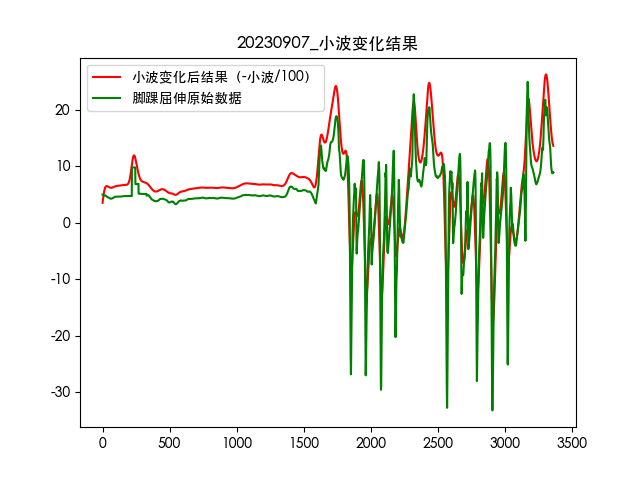

In [47]:
plt.close()
plt.rcParams['font.sans-serif'] = ['Heiti TC']
plt.rcParams['font.family'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False

plt.plot(-cwt[0][0:-100]/100,"r",label="小波变化后结果（-小波/100）")
plt.plot(y[0:-100],"g",label="脚踝屈伸原始数据")
plt.legend()
plt.title("20230907_小波变化结果")

In [36]:
plt.close()

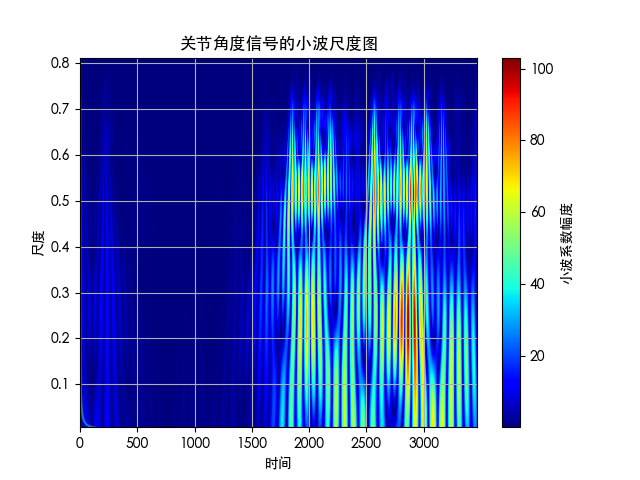

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# 准备关节角度信号数据


# 选择小波函数和尺度范围
wavelet_name = 'morl'  # 使用Morlet小波函数
scales = np.arange(1, 128)  # 尺度范围

# 进行连续小波变换
coef, freqs = pywt.cwt(L_Ankle_D, scales, wavelet_name, sampling_period=1)

# 绘制尺度图
plt.imshow(np.abs(coef), extent=[0, len(L_Ankle_D), freqs[-1], freqs[0]], cmap='jet', aspect='auto')
plt.colorbar(label='小波系数幅度')
plt.xlabel('时间')
plt.ylabel('尺度')
plt.title('关节角度信号的小波尺度图')
plt.show()

## 写循环

### 计算特征值

In [45]:
# 计算特征值
def CalEvents(data, events, peak_height, peak_prominence):
    """
    计算给定数据中与给定事件最接近的峰值。

    参数：
    - data：一维数组，代表输入数据。
    - events：一维数组，代表事件列表。
    - peak_height：标量或一维数组，峰值的高度阈值。
    - peak_prominence：标量或一维数组，峰值的突出度阈值。

    返回值：
    与每个事件最接近的峰值列表。

    示例：
    data = [0, 1, 2, 1, 0, 1, 2, 1, 0]
    events = [1, 2, 3]
    peak_height = 0.5
    peak_prominence = 0.5
    result = CalEvents(data, events, peak_height, peak_prominence)
    # 返回 [1, 2, 1]

    """
    from scipy.signal import find_peaks
    import numpy as np
    peaks, _ = find_peaks(data, height=peak_height, prominence=peak_prominence)

    # 查找和event 最接近的值
    nearest_values = []
    for event in events:
        nearest_index  = np.argmin(np.abs(peaks-event))
        nearest_value = peaks[nearest_index]
        nearest_values.append(nearest_value)
    
    cal_events = nearest_values
    return cal_events

### 绘制特征值

In [111]:
# 提取数据,绘制图片
import os
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Heiti TC']
plt.rcParams['font.family'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False
def PlotEvents(data,events,cal_events,select_column,plot_title,plot_dir):

    """
    功能：绘制特征时刻图片
    data: series, 选取的信号曲线
    events: 列表，人工获取得到的特征时刻的金标准
    cal_events: 计算得到的特征时刻
    plot_title: 绘制图片的标题
    plot_path: 图片储存的路径
    """

    # 绘制计算得到的特征时刻
    plt.plot(data, label=select_column,color="green")
    plt.plot(cal_events, data[cal_events],"x", color="green")

    # 绘制人工获取的特征时刻
    plt.plot(events, data[events],"o", label="events", color="blue")
    plt.legend()

    # 绘制标题并显示图像
    plt.title(plot_title)
    #plt.show()

    # 保存图片
    plot_path = os.path.join(plot_dir, plot_title)
    plt.savefig(plot_path)
    plt.close()

### 评价算法精度

In [109]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import numpy as np
def EvaluateAccuracy(events, cal_events):
    """
    计算事件和计算事件之间的准确性指标。

    参数：
    - events：一维数组，事件列表。
    - cal_events：一维数组，计算得到的事件列表。

    返回值：
    MAE：平均绝对误差（Mean Absolute Error）。
    MAPE：平均绝对百分比误差（Mean Absolute Percentage Error）。
    RMSE：均方根误差（Root Mean Squared Error）。
    ICC：皮尔逊相关系数（Pearson correlation coefficient）。
    p_value：ICC的假设检验p值。

    """

    MAE = mean_absolute_error(events, cal_events)
    MAPE = mean_absolute_percentage_error(events, cal_events)
    MSE = mean_squared_error(events, cal_events)
    RMSE = np.sqrt(MSE)
    ICC, p_value = pearsonr(events, cal_events)

    return round(MAE,2), round(MAPE,2), round(RMSE,2), round(ICC,2), round(p_value,3)

### 主函数

In [ ]:
# 调用包
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks 
from collections import defaultdict

# 定义变量
sheet_name = "Joint Angles ZXY"
segment_type = "左脚"
select_column = 'Left Ankle Dorsiflexion/Plantarflexion'
events_cols = [f"{segment_type}第一次着地",f"{segment_type}第二次着地",f"{segment_type}第三次着地"]

# 定义算法变量
peak_prominence = 5
peak_height = [2,15]

# 路径
root_dir_path = "/Users/wangshuaibo/Library/CloudStorage/OneDrive-bsu.edu.cn/工作文档/北京悦动/脑卒中项目/阿帅笔记/HarbinStroke"
xsens_excel_folder_path = "./Xsens/Process_Data/Excel"
plot_dir = "./Xsens/Event/Plot"
result_excel_dir = "./Xsens/Event"
events_path = "./文档/20230919_陈思彤_stroke特征时刻_删除无效数据.xlsx"

# 切换路径
os.chdir(root_dir_path)
# 读取特征时刻数据
events_df = pd.read_excel(events_path)

# 构建默认词典
results = defaultdict(list)

# 循环读取所有特征时刻
for index, row in events_df.iterrows():  
    events = row[events_cols]
    name = row["受试者姓名"]
    footwear_test_number = row["穿鞋条件"]
    # Excel 对应的文件名
    xsens_excel_partial_name = f"{name}_Xsens_{footwear_test_number}"

    # 查找对应的 Xsens Excel 名称
    partial_pattern = f"*{xsens_excel_partial_name}*"

    import os
    import fnmatch
    # 读取姓名对应的 Excel 表
    for file_name in os.listdir(xsens_excel_folder_path):
        if fnmatch.fnmatch(file_name, partial_pattern):

            # 确定图片名称
            file_name_no_ext, _ = os.path.splitext(file_name)
            file_name_algo = f"{segment_type}_{peak_height}_{peak_prominence}"
            plot_title = file_name_no_ext + "_" + file_name_algo + ".png"

            # 读取数据
            file_name_path = os.path.join(xsens_excel_folder_path,file_name)
            df = pd.read_excel(file_name_path,sheet_name=sheet_name)
            data = df[select_column]

            # 计算特征时刻
            cal_events = CalEvents(data,events,peak_height,peak_prominence)

            # 比较特征时刻计算值与真实值
            ## 1.绘制图片
            PlotEvents(data, events, cal_events, select_column, plot_title, plot_dir)

            ## 2.计算标准
            MAE, MAPE, RMSE, ICC,p_value = EvaluateAccuracy(events, cal_events)

            # 进行词典列表累加
            # 测试属性增加到列表
            results["name"].append(name)
            results["sheet"].append(sheet_name)
            results["seg_type"].append(segment_type)
            results["sel_col"].append(select_column)

            # 评价指标增加到列表
            results["MAE"].append(MAE)
            results["MAPE"].append(MAPE)
            results["RMSE"].append(RMSE)
            results["ICC"].append(ICC)
            results["p"].append(p_value)   

            # 算法属性增加到列表
            results["height"].append(peak_height)
            results["prominence"].append(peak_prominence)
        #else:
            #print(f"未在文件夹中找到:{xsens_excel_partial_name}")



In [126]:
result_df

,name,sheet_name,segment_type,select_column,MAE,MAPE,RMSE,ICC,p_value,peak_height,peak_prominence
0,唐怀连,Joint Angles ZXY,左脚,Left Ankle Dorsiflexion/Plantarflexion,155.67,0.08,178.81,0.87,0.330,"[2, 15]",5
1,逄增起,Joint Angles ZXY,左脚,Left Ankle Dorsiflexion/Plantarflexion,37.33,0.03,41.44,0.99,0.065,"[2, 15]",5
2,潘忠文,Joint Angles ZXY,左脚,Left Ankle Dorsiflexion/Plantarflexion,27.67,0.01,34.62,1.00,0.045,"[2, 15]",5
3,刘辉,Joint Angles ZXY,左脚,Left Ankle Dorsiflexion/Plantarflexion,497.33,0.27,503.11,0.87,0.327,"[2, 15]",5
4,王兴凯,Joint Angles ZXY,左脚,Left Ankle Dorsiflexion/Plantarflexion,850.00,0.26,859.09,0.86,0.342,"[2, 15]",5
5,周超,Joint Angles ZXY,左脚,Left Ankle Dorsiflexion/Plantarflexion,18.33,0.01,18.56,1.00,0.009,"[2, 15]",5
6,李国满,Joint Angles ZXY,左脚,Left Ankle Dorsiflexion/Plantarflexion,77.33,0.04,103.01,0.89,0.296,"[2, 15]",5
7,吕春霞,Joint Angles ZXY,左脚,Left Ankle Dorsiflexion/Plantarflexion,27.00,0.02,27.45,1.00,0.029,"[2, 15]",5
8,李平军,Joint Angles ZXY,左脚,Left Ankle Dorsiflexion/Plantarflexion,4.33,0.00,4.65,1.00,0.004,"[2, 15]",5
9,凌若飞,Joint Angles ZXY,左脚,Left Ankle Dorsiflexion/Plantarflexion,7.67,0.00,7.94,1.00,0.001,"[2, 15]",5


In [128]:
# 将计算结果写入 Excel
result_df = pd.DataFrame(results)

# 将 p 大于 0.05 进行标记
#yellow_bg = "background-color: yellow"
#result_df.loc[result_df["p"]>=0.05,:] = yellow_bg
result_excel_name = file_name_algo+ ".xlsx"
result_excel_path = os.path.join(result_excel_dir, result_excel_name)
result_df.to_excel(result_excel_path,index=False)

PearsonRResult(statistic=0.9108716407376102, pvalue=5.775489082232593e-17)

## 将 excel 数据和文件管理中的数据进行匹配


## Todo
1. 计算右脚的偏差
2. 将图片保存到Excel 当中
3. 挑选异常值
4. 增加鲁棒性
   1. 增加 try except 以及 rasie
5. 增加断点
6. 增加单元测试
7. 清理特征时刻的名称🧑‍🎓王帅波
8. 查看步态特征数据特征图片，并在 Excel 中标注 ｜ 和大陈讨论内容
9. 截取步态走路时刻，删除无效数据，重新计算 RMSE
10. 确定手动截取数据特征值的数量（人数、条件）
11. 确定下一步的计划

In [2]:
!pip install PyQt5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 5.1 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 9.4 MB/s eta 0:00:00:00:0100:01


In [1]:
from PyQt5.QtWidgets import QApplication, QWidget, QLabel, QLineEdit, QPushButton, QVBoxLayout

class BMIWindow(QWidget):
    def __init__(self):
        super().__init__()

        self.setWindowTitle("BMI Calculator")

        # 创建标签和输入框
        self.label_weight = QLabel("Weight (kg):")
        self.input_weight = QLineEdit()
        self.label_height = QLabel("Height (cm):")
        self.input_height = QLineEdit()

        # 创建计算按钮
        self.button_calculate = QPushButton("Calculate")
        self.button_calculate.clicked.connect(self.calculate_bmi)

        # 创建结果标签
        self.label_result = QLabel()

        # 创建布局并添加部件
        layout = QVBoxLayout()
        layout.addWidget(self.label_weight)
        layout.addWidget(self.input_weight)
        layout.addWidget(self.label_height)
        layout.addWidget(self.input_height)
        layout.addWidget(self.button_calculate)
        layout.addWidget(self.label_result)

        self.setLayout(layout)

    def calculate_bmi(self):
        weight = float(self.input_weight.text())
        height = float(self.input_height.text()) / 100  # 将身高转换为米

        bmi = weight / (height ** 2)

        self.label_result.setText(f"BMI: {bmi:.2f}")

if __name__ == '__main__':
    app = QApplication([])
    window = BMIWindow()
    window.show()
    app.exec_()

2023-10-23 21:52:05.623 python[56944:6529002] TSM AdjustCapsLockLEDForKeyTransitionHandling - _ISSetPhysicalKeyboardCapsLockLED Inhibit


: 